In [22]:
from pathlib import Path
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import h5py
import copy
import pickle
from astropy.visualization import make_lupton_rgb
from functions.plot_data import plot_data

# Project modules
from functions.plot_data import plot_data
from lib.Stokes import Stokes
from lib.Derived import Derived

In [ ]:
# Check that the Stokes object file exists
stokes_filename = "generated/objects/stokes.pickle"
my_file = Path(stokes_filename)
if not my_file.is_file():
    print("Stokes object does not exist (", stokes_filename,"), please run file init_data.py first")

# Check that the Nova object file exists
nova_filename = "generated/objects/derived.pickle"
my_file = Path(nova_filename)
if not my_file.is_file():
    print("Nova object does not exist (", nova_filename,"), please run file init_data.py first")

# Load the objects from the files
print("Loading Stokes data from file", stokes_filename)
stokes_list = pickle.load(open(stokes_filename, "rb"))
print("Loading Nova data from file", nova_filename)
nova = pickle.load(open(nova_filename, "rb"))


Loading Stokes data from file generated/objects/stokes.pickle
Loading Nova data from file generated/objects/derived.pickle


: 

In [23]:
# Calculate total polarization
print("Calculaing total polarization")
nova.total_polarization()
fig, _ = nova.plot_total_polarization(scale=[0, 1])
fig.savefig("generated/" + "total_polarization.png", dpi=200)
print("Saved figure to file", "generated/total_polarization.png")

Calculaing total polarization


TypeError: Derived.plot_total_polarization() got an unexpected keyword argument 'scale'

In [10]:
# Calculate polarizations, plot images

# Initializing derived parameter object
nova = Derived(stokes_list)

# Calculate total polarization
print("Calculaing total polarization")
nova.total_polarization()
fig, _ = nova.plot_total_polarization(0, 1)
fig.savefig("generated/" + "total_polarization.png", dpi=200)
print("Saved figure to file", "generated/total_polarization.png")


# Calculate linear polarization
print("Calculaing linear polarization")
nova.linear_polarization()
fig, _ = nova.plot_linear_polarization()
fig.savefig("generated/" + "linear_polarization.png", dpi=200)
print("Saved figure to file", "generated/linear_polarization.png")

# Calculate circular polarization
print("Calculaing circular polarization")
nova.circular_polarization()
fig, _ = nova.plot_circular_polarization()
fig.savefig("generated/" + "circular_polarization.png", dpi=200)
print("Saved figure to file", "generated/circular_polarization.png")

Calculaing total polarization


KeyboardInterrupt: 

Calculaing total polarization


TypeError: Derived.plot_total_polarization() takes 1 positional argument but 3 were given

Saved figure to file generated/RGB_polarization.png


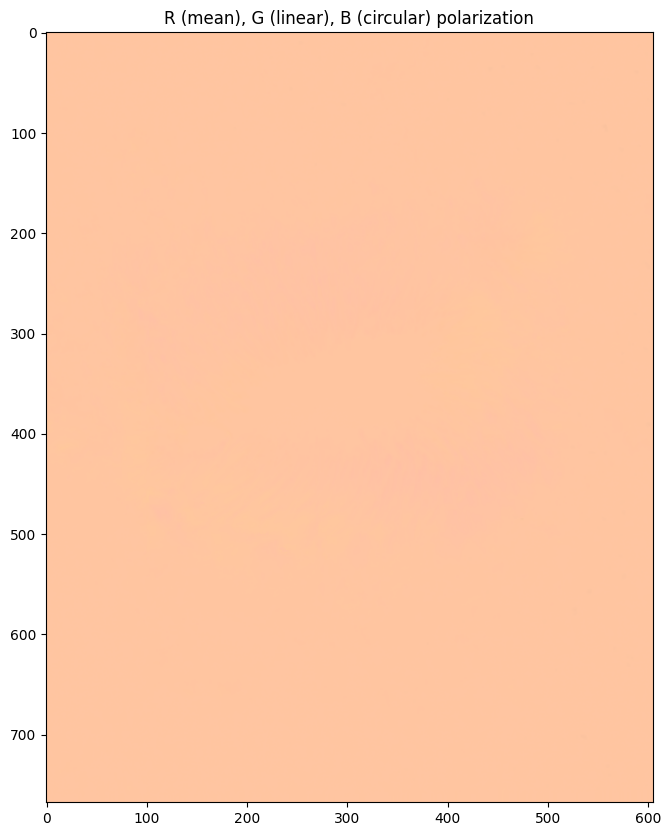

In [ ]:
# Generate RGB image from polarization data
image = make_lupton_rgb(nova.mp, nova.lp, nova.cp, stretch=0.1, Q=6)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image, origin='upper')
ax.set_title("R (mean), G (linear), B (circular) polarization")
fig.savefig("generated/" + "RGB_polarization.png", dpi=200)
print("Saved figure to file", "generated/" + "RGB_polarization.png")